# Hots [Lagorce Et Al.  2018]

## 1. Read Events

In [1]:
from concepts import Event, Camera, Polarity, MotionFrame
from hots import Hierarchy, SurfaceClusterLayer
import matplotlib.pyplot as plt
import random
import h5py

In [2]:
filename = '../datasets/sample_N-MNIST.hdf5'
dataset = h5py.File(filename, 'r')
dvs34 = Camera(width=34, height=34)

data = dataset['0']['digit_06327']

events = [Event(*ev) for ev in data]
positive_events = [ev for ev in events if ev.polarity == 1]
negative_events = [ev for ev in events if ev.polarity == -1]

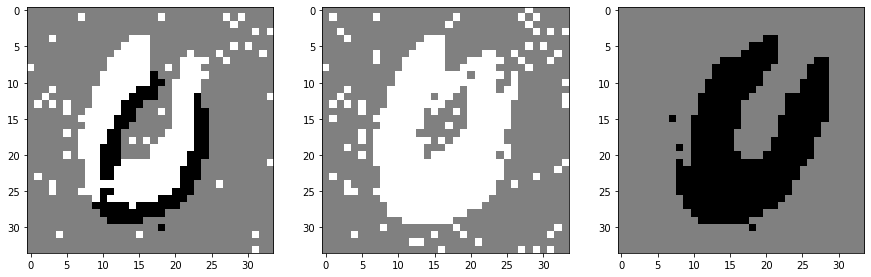

In [3]:
fig=plt.figure(figsize=(15,15))

for i, all_events in enumerate([events, positive_events, negative_events ]):
    some_events = all_events[:1400]
    mf = MotionFrame(camera=dvs34, events=some_events)
    fig.add_subplot(1, 3, i+1)
    mf.show()
plt.show()

## 2. Time Surface

In [4]:
num_features = 4
neighborhood_size = 4
integration_scale = 0.04
l1_polarities = {Polarity(name='negative', encoding= -1), Polarity(name='positive', encoding=1) }

layer = SurfaceClusterLayer(dvs34, l1_polarities, events, num_features, neighborhood_size, integration_scale)

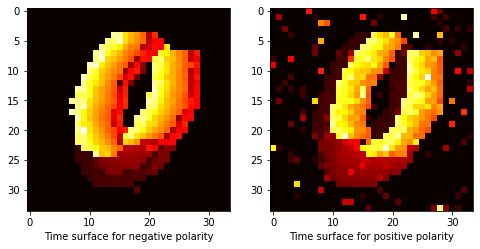

In [5]:
fig=plt.figure(figsize=(8,8))

for i, polarity in enumerate(l1_polarities):
    fig.add_subplot(1, len(l1_polarities), i+1)
    plt.imshow(layer.time_surface.data[:,:,i], cmap='hot')
    plt.xlabel(f'Time surface for {polarity.name} polarity')
plt.show()

In [6]:
layer.process_all()

### First Layer

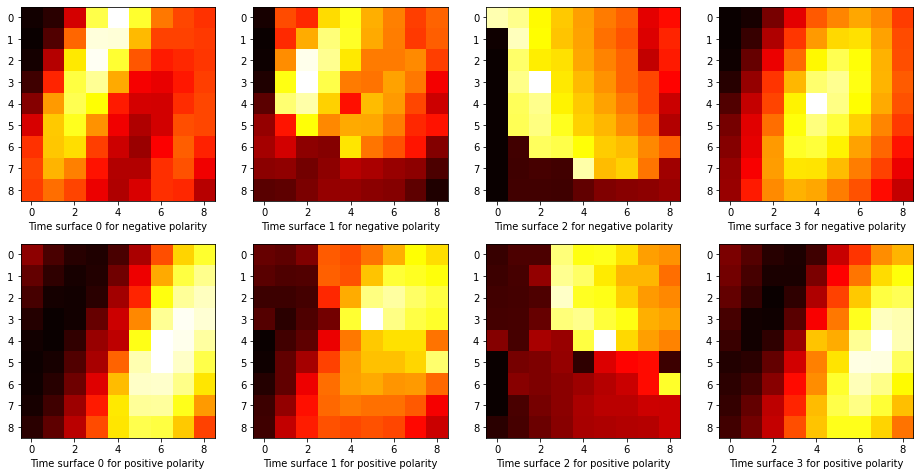

In [7]:
fig=plt.figure(figsize=(16,8))
for i, proto in enumerate(layer.prototypes):
    for j, polarity in enumerate(l1_polarities):
        fig.add_subplot(len(l1_polarities), len(layer.prototypes), j*len(layer.prototypes)+i+1)
        plt.imshow(proto.data[:,:,j], cmap='hot')
        plt.xlabel(f'Time surface {i} for {polarity.name} polarity')
plt.show()

### Second Layer

In [8]:
layer2_polarities = []
for i in range(4):
    layer2_polarities.append(Polarity(name=f'L{1}_proto{i}', encoding=i))

layer2 = SurfaceClusterLayer(dvs34, layer2_polarities, layer.output, num_features*2, neighborhood_size*2, integration_scale*5)

In [9]:
layer2.process_all()

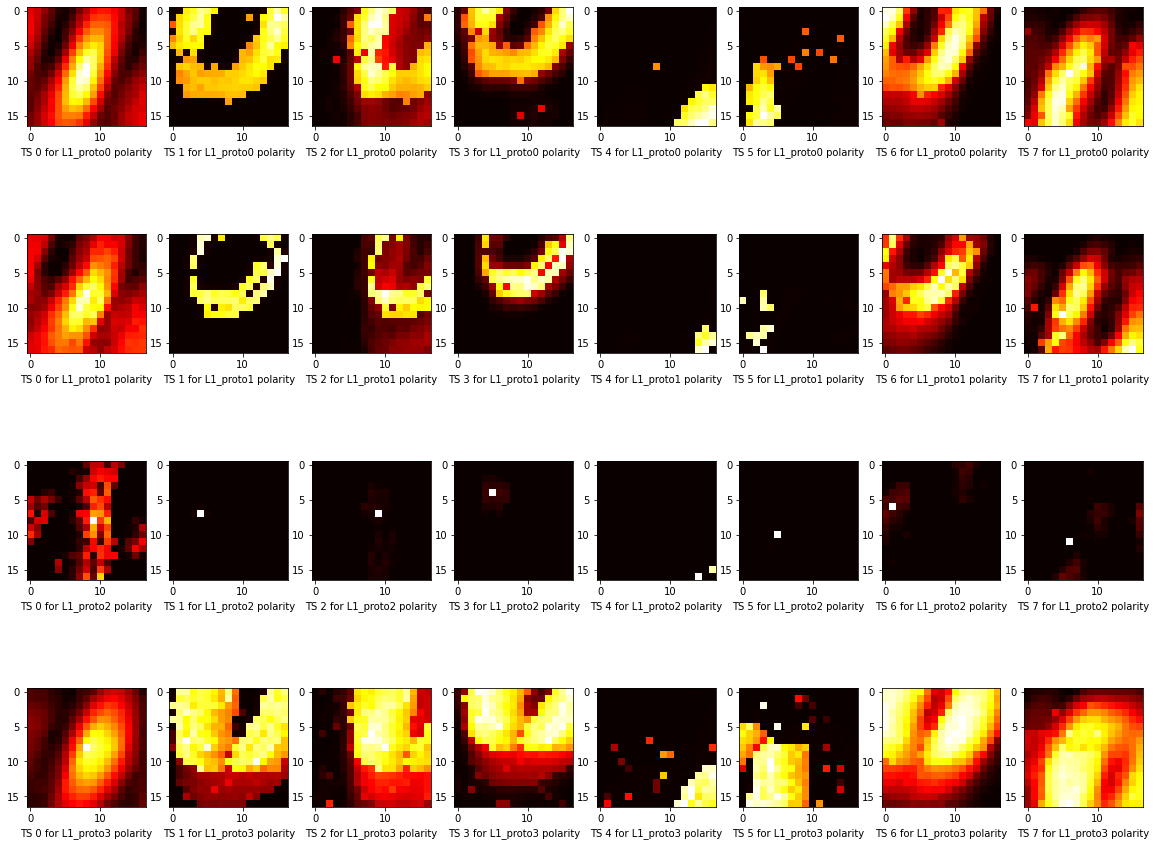

In [10]:
fig=plt.figure(figsize=(20,16))
for i, proto in enumerate(layer2.prototypes):
    for j, polarity in enumerate(layer2_polarities):
        fig.add_subplot(len(layer2_polarities), len(layer2.prototypes), j*len(layer2.prototypes)+i+1)
        plt.imshow(proto.data[:,:,j], cmap='hot')
        plt.xlabel(f'TS {i} for {polarity.name} polarity')
plt.show()

### Third Layer

In [11]:
layer3_polarities = []
for i in range(8):
    layer3_polarities.append(Polarity(name=f'L{2}_proto{i}', encoding=i))

layer3 = SurfaceClusterLayer(dvs34, layer3_polarities, layer2.output, num_features*4, neighborhood_size*4, integration_scale*25)

In [12]:
layer3.process_all()

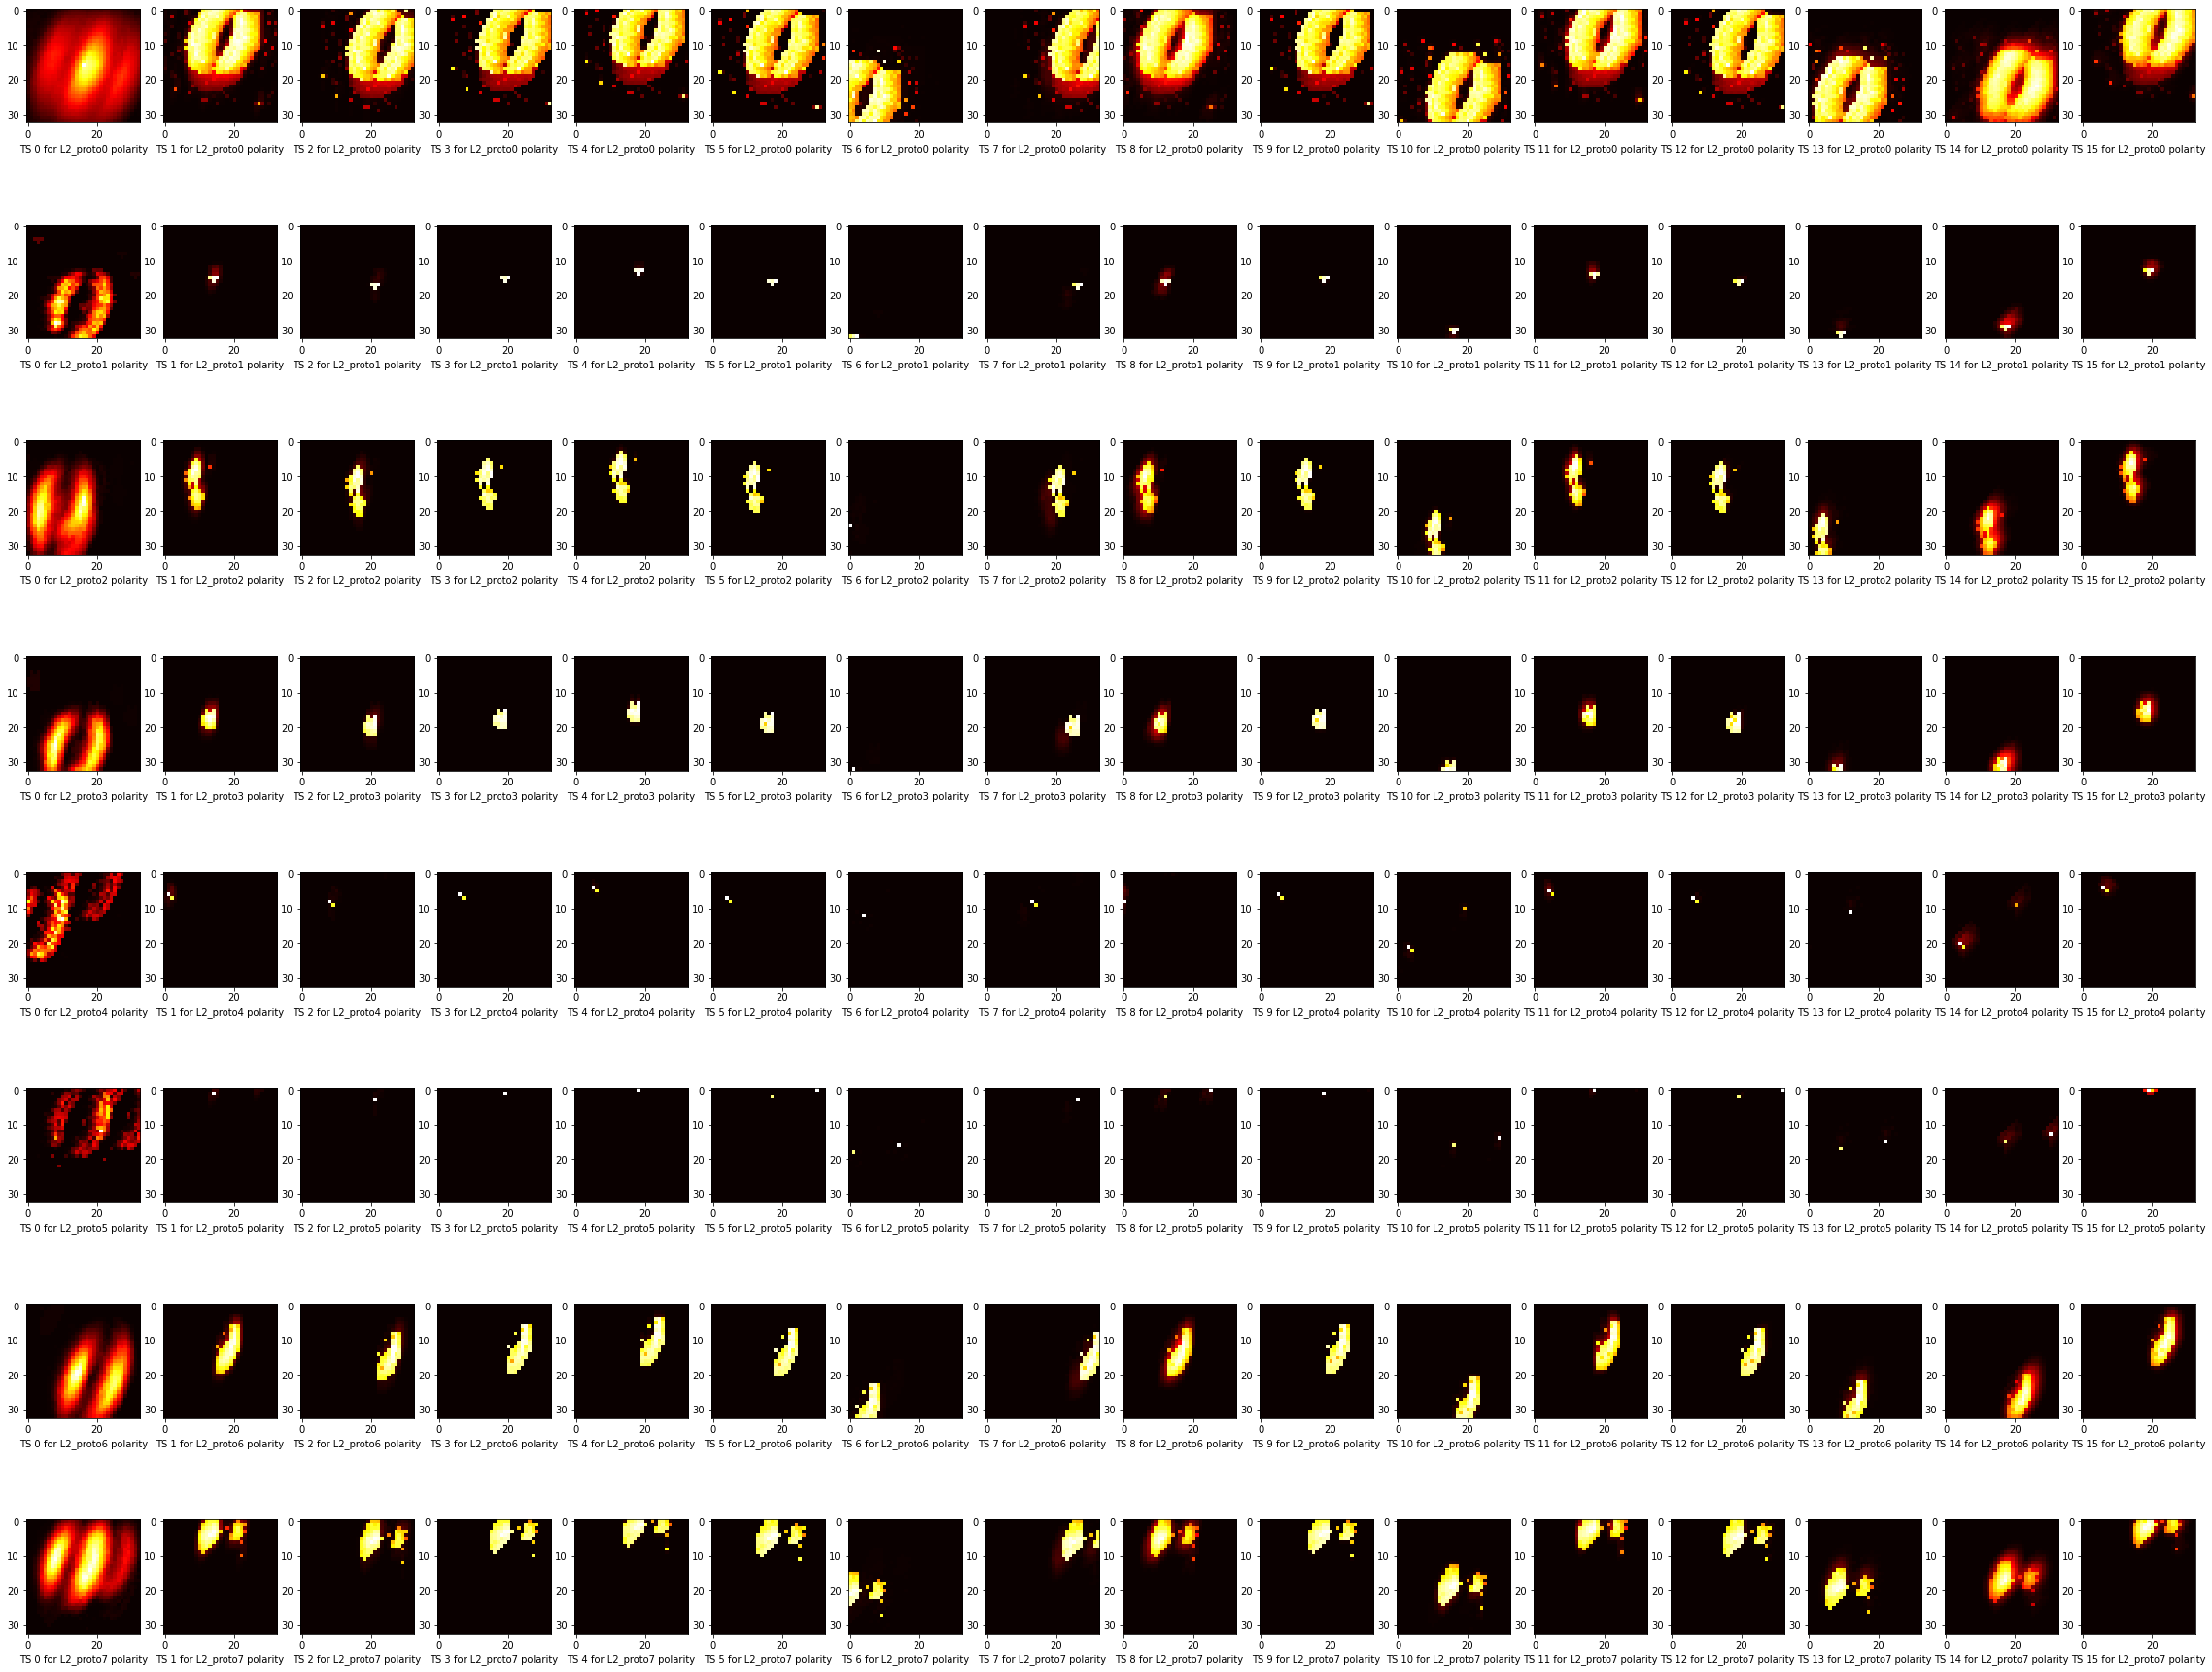

In [13]:
fig=plt.figure(figsize=(40,32))
for i, proto in enumerate(layer3.prototypes):
    for j, polarity in enumerate(layer3_polarities):
        fig.add_subplot(len(layer3_polarities), len(layer3.prototypes), j*len(layer3.prototypes)+i+1)
        plt.imshow(proto.data[:,:,j], cmap='hot')
        plt.xlabel(f'TS {i} for {polarity.name} polarity')
plt.show()

## Building a Hierarchy of layers

In [14]:
from tqdm import tqdm

In [16]:
filename = '../datasets/20samples_N-MNIST.hdf5'
dataset = h5py.File(filename, 'r')
hots = Hierarchy(dvs34, N=4, R=4, tau=0.04, KN=2, KR=2, KT=5)

In [28]:
n_samples = 15
n_test_samples = 5
n_classes = 4
n_epochs = 3

In [26]:
# Get a list of tuples containing (digit_label, file_name)
all_digits = []
for digit in range(n_classes):
    digit_names = list(dataset[f'{digit}'].keys())[:n_samples]
    for name in digit_names:
        all_digits.append((digit, name))

In [27]:
for times in range(n_epochs):
    # Shuffle indexes to change presentation order
    random.shuffle(all_digits)
    
    print(f'Starting presentation #{times+1}')
    
    # We present the data several times because at the very first time layers are not properly initialized
    # and activations might not be correct
    for train_img in tqdm(all_digits):
        digit, name = train_img      
        data = dataset[f'{digit}'][f'{name}']
        print(f'Processing digit: {name} label: {digit}')
        events = [Event(*ev) for ev in data]
        output = hots.process(events, mode='train')

  0%|          | 0/60 [00:00<?, ?it/s]

Starting presentation #1
Processing digit: digit_40366 label: 2


  2%|▏         | 1/60 [00:09<09:31,  9.69s/it]

Processing digit: digit_26975 label: 2


  3%|▎         | 2/60 [00:18<09:00,  9.32s/it]

Processing digit: digit_11667 label: 1


  5%|▌         | 3/60 [00:22<07:34,  7.98s/it]

Processing digit: digit_28970 label: 1


  7%|▋         | 4/60 [00:30<07:13,  7.74s/it]

Processing digit: digit_41722 label: 2


  8%|▊         | 5/60 [00:37<07:06,  7.75s/it]

Processing digit: digit_28958 label: 3


 10%|█         | 6/60 [00:52<08:43,  9.70s/it]

Processing digit: digit_12352 label: 0


 12%|█▏        | 7/60 [01:03<08:53, 10.07s/it]

Processing digit: digit_12346 label: 3


 13%|█▎        | 8/60 [01:15<09:26, 10.90s/it]

Processing digit: digit_04242 label: 2


 15%|█▌        | 9/60 [01:25<08:59, 10.58s/it]

Processing digit: digit_40414 label: 2


 17%|█▋        | 10/60 [01:37<09:03, 10.87s/it]

Processing digit: digit_14051 label: 2


 18%|█▊        | 11/60 [01:49<09:07, 11.16s/it]

Processing digit: digit_37844 label: 1


 20%|██        | 12/60 [01:57<08:13, 10.29s/it]

Processing digit: digit_02155 label: 1


 22%|██▏       | 13/60 [02:03<06:58,  8.90s/it]

Processing digit: digit_26785 label: 0


 23%|██▎       | 14/60 [02:17<08:09, 10.64s/it]

Processing digit: digit_20486 label: 2


 25%|██▌       | 15/60 [02:33<09:10, 12.22s/it]

Processing digit: digit_40400 label: 1


 27%|██▋       | 16/60 [02:38<07:23, 10.09s/it]

Processing digit: digit_16652 label: 1


 28%|██▊       | 17/60 [02:43<05:59,  8.36s/it]

Processing digit: digit_46071 label: 3


 30%|███       | 18/60 [02:54<06:28,  9.25s/it]

Processing digit: digit_32082 label: 2


 32%|███▏      | 19/60 [03:07<07:05, 10.38s/it]

Processing digit: digit_35935 label: 0


 33%|███▎      | 20/60 [03:26<08:44, 13.11s/it]

Processing digit: digit_03263 label: 0


 35%|███▌      | 21/60 [03:41<08:49, 13.57s/it]

Processing digit: digit_05612 label: 3


 37%|███▋      | 22/60 [03:54<08:29, 13.42s/it]

Processing digit: digit_02633 label: 3


 38%|███▊      | 23/60 [04:02<07:18, 11.86s/it]

Processing digit: digit_14723 label: 0


 40%|████      | 24/60 [04:16<07:26, 12.39s/it]

Processing digit: digit_36596 label: 3


 42%|████▏     | 25/60 [04:32<07:46, 13.33s/it]

Processing digit: digit_46059 label: 1


 43%|████▎     | 26/60 [04:40<06:44, 11.91s/it]

Processing digit: digit_49356 label: 1


 45%|████▌     | 27/60 [04:44<05:17,  9.61s/it]

Processing digit: digit_06333 label: 0


 47%|████▋     | 28/60 [04:58<05:45, 10.79s/it]

Processing digit: digit_11897 label: 2


 48%|████▊     | 29/60 [05:08<05:29, 10.64s/it]

Processing digit: digit_44672 label: 3


 50%|█████     | 30/60 [05:22<05:49, 11.64s/it]

Processing digit: digit_44114 label: 1


 52%|█████▏    | 31/60 [05:28<04:49, 10.00s/it]

Processing digit: digit_40428 label: 3


 53%|█████▎    | 32/60 [05:44<05:25, 11.64s/it]

Processing digit: digit_44128 label: 0


 55%|█████▌    | 33/60 [05:59<05:41, 12.65s/it]

Processing digit: digit_15429 label: 1


 57%|█████▋    | 34/60 [06:05<04:40, 10.80s/it]

Processing digit: digit_02627 label: 2


 58%|█████▊    | 35/60 [06:18<04:45, 11.41s/it]

Processing digit: digit_44882 label: 2


 60%|██████    | 36/60 [06:32<04:47, 11.99s/it]

Processing digit: digit_21954 label: 0


 62%|██████▏   | 37/60 [06:49<05:15, 13.72s/it]

Processing digit: digit_45236 label: 0


 63%|██████▎   | 38/60 [07:09<05:40, 15.48s/it]

Processing digit: digit_41078 label: 0


 65%|██████▌   | 39/60 [07:21<05:05, 14.53s/it]

Processing digit: digit_06441 label: 3


 67%|██████▋   | 40/60 [07:33<04:36, 13.83s/it]

Processing digit: digit_16120 label: 0


 68%|██████▊   | 41/60 [07:50<04:39, 14.73s/it]

Processing digit: digit_09014 label: 1


 70%|███████   | 42/60 [07:58<03:46, 12.58s/it]

Processing digit: digit_07039 label: 0


 72%|███████▏  | 43/60 [08:18<04:13, 14.94s/it]

Processing digit: digit_16108 label: 1


 73%|███████▎  | 44/60 [08:27<03:27, 12.99s/it]

Processing digit: digit_01448 label: 2


 75%|███████▌  | 45/60 [08:39<03:12, 12.86s/it]

Processing digit: digit_17570 label: 3


 77%|███████▋  | 46/60 [08:53<03:04, 13.16s/it]

Processing digit: digit_37850 label: 1


 78%|███████▊  | 47/60 [09:02<02:34, 11.89s/it]

Processing digit: digit_34395 label: 0


 80%|████████  | 48/60 [09:12<02:16, 11.40s/it]

Processing digit: digit_35909 label: 1


 82%|████████▏ | 49/60 [09:19<01:50, 10.00s/it]

Processing digit: digit_07987 label: 2


 83%|████████▎ | 50/60 [09:31<01:46, 10.60s/it]

Processing digit: digit_16646 label: 3


 85%|████████▌ | 51/60 [09:43<01:39, 11.06s/it]

Processing digit: digit_05148 label: 0


 87%|████████▋ | 52/60 [09:58<01:38, 12.29s/it]

Processing digit: digit_14737 label: 3


 88%|████████▊ | 53/60 [10:07<01:18, 11.24s/it]

Processing digit: digit_07763 label: 3


 90%|█████████ | 54/60 [10:18<01:07, 11.22s/it]

Processing digit: digit_21940 label: 3


 92%|█████████▏| 55/60 [10:33<01:01, 12.34s/it]

Processing digit: digit_05174 label: 3


 93%|█████████▎| 56/60 [10:47<00:50, 12.74s/it]

Processing digit: digit_00024 label: 1


 95%|█████████▌| 57/60 [10:53<00:32, 10.86s/it]

Processing digit: digit_06327 label: 0


 97%|█████████▋| 58/60 [11:04<00:21, 10.94s/it]

Processing digit: digit_24804 label: 2


 98%|█████████▊| 59/60 [11:17<00:11, 11.47s/it]

Processing digit: digit_22285 label: 2


  0%|          | 0/60 [00:00<?, ?it/s]

Starting presentation #2
Processing digit: digit_07763 label: 3


  2%|▏         | 1/60 [00:13<13:33, 13.79s/it]

Processing digit: digit_21954 label: 0


  3%|▎         | 2/60 [00:32<14:52, 15.39s/it]

Processing digit: digit_28958 label: 3


  5%|▌         | 3/60 [00:51<15:38, 16.47s/it]

Processing digit: digit_05148 label: 0


  7%|▋         | 4/60 [01:08<15:19, 16.42s/it]

Processing digit: digit_41078 label: 0


  8%|▊         | 5/60 [01:22<14:25, 15.74s/it]

Processing digit: digit_40366 label: 2


 10%|█         | 6/60 [01:34<13:12, 14.68s/it]

Processing digit: digit_16652 label: 1


 12%|█▏        | 7/60 [01:39<10:22, 11.75s/it]

Processing digit: digit_22285 label: 2


 13%|█▎        | 8/60 [01:43<08:15,  9.52s/it]

Processing digit: digit_06333 label: 0


 15%|█▌        | 9/60 [01:57<09:15, 10.89s/it]

Processing digit: digit_34395 label: 0


 17%|█▋        | 10/60 [02:08<09:06, 10.93s/it]

Processing digit: digit_01448 label: 2


 18%|█▊        | 11/60 [02:27<10:55, 13.37s/it]

Processing digit: digit_14737 label: 3


 20%|██        | 12/60 [03:14<18:42, 23.38s/it]

Processing digit: digit_40428 label: 3


 22%|██▏       | 13/60 [03:30<16:28, 21.03s/it]

Processing digit: digit_44672 label: 3


 23%|██▎       | 14/60 [03:43<14:19, 18.68s/it]

Processing digit: digit_16120 label: 0


 25%|██▌       | 15/60 [03:59<13:27, 17.95s/it]

Processing digit: digit_05174 label: 3


 27%|██▋       | 16/60 [04:14<12:23, 16.90s/it]

Processing digit: digit_00024 label: 1


 28%|██▊       | 17/60 [04:21<10:01, 13.99s/it]

Processing digit: digit_11667 label: 1


 30%|███       | 18/60 [04:27<08:11, 11.71s/it]

Processing digit: digit_02155 label: 1


 32%|███▏      | 19/60 [04:33<06:51, 10.05s/it]

Processing digit: digit_46059 label: 1


 33%|███▎      | 20/60 [04:43<06:33,  9.84s/it]

Processing digit: digit_37850 label: 1


 35%|███▌      | 21/60 [04:56<07:09, 11.00s/it]

Processing digit: digit_16646 label: 3


 37%|███▋      | 22/60 [05:09<07:10, 11.32s/it]

Processing digit: digit_24804 label: 2


 38%|███▊      | 23/60 [05:22<07:21, 11.93s/it]

Processing digit: digit_32082 label: 2


 40%|████      | 24/60 [05:35<07:17, 12.15s/it]

Processing digit: digit_44114 label: 1


 42%|████▏     | 25/60 [05:40<05:54, 10.12s/it]

Processing digit: digit_14723 label: 0


 43%|████▎     | 26/60 [05:56<06:41, 11.81s/it]

Processing digit: digit_14051 label: 2


 45%|████▌     | 27/60 [06:09<06:48, 12.39s/it]

Processing digit: digit_09014 label: 1


 47%|████▋     | 28/60 [06:15<05:34, 10.44s/it]

Processing digit: digit_35909 label: 1


 48%|████▊     | 29/60 [06:22<04:47,  9.27s/it]

Processing digit: digit_02633 label: 3


 50%|█████     | 30/60 [06:31<04:39,  9.33s/it]

Processing digit: digit_16108 label: 1


 52%|█████▏    | 31/60 [06:38<04:04,  8.43s/it]

Processing digit: digit_26975 label: 2


 53%|█████▎    | 32/60 [06:49<04:16,  9.17s/it]

Processing digit: digit_12346 label: 3


 55%|█████▌    | 33/60 [07:03<04:53, 10.86s/it]

Processing digit: digit_44882 label: 2


 57%|█████▋    | 34/60 [07:15<04:48, 11.10s/it]

Processing digit: digit_21940 label: 3


 58%|█████▊    | 35/60 [07:34<05:34, 13.38s/it]

Processing digit: digit_40400 label: 1


 60%|██████    | 36/60 [07:38<04:18, 10.77s/it]

Processing digit: digit_17570 label: 3


 62%|██████▏   | 37/60 [07:49<04:04, 10.65s/it]

Processing digit: digit_49356 label: 1


 63%|██████▎   | 38/60 [07:53<03:09,  8.62s/it]

Processing digit: digit_40414 label: 2


 65%|██████▌   | 39/60 [08:05<03:26,  9.83s/it]

Processing digit: digit_11897 label: 2


 67%|██████▋   | 40/60 [08:15<03:18,  9.91s/it]

Processing digit: digit_28970 label: 1


 68%|██████▊   | 41/60 [08:23<02:54,  9.16s/it]

Processing digit: digit_04242 label: 2


 70%|███████   | 42/60 [08:33<02:52,  9.60s/it]

Processing digit: digit_46071 label: 3


 72%|███████▏  | 43/60 [08:45<02:51, 10.10s/it]

Processing digit: digit_35935 label: 0


 73%|███████▎  | 44/60 [09:01<03:11, 11.94s/it]

Processing digit: digit_20486 label: 2


 75%|███████▌  | 45/60 [09:17<03:18, 13.26s/it]

Processing digit: digit_07987 label: 2


 77%|███████▋  | 46/60 [09:29<03:00, 12.87s/it]

Processing digit: digit_06441 label: 3


 78%|███████▊  | 47/60 [09:41<02:44, 12.68s/it]

Processing digit: digit_26785 label: 0


 80%|████████  | 48/60 [09:56<02:40, 13.35s/it]

Processing digit: digit_05612 label: 3


 82%|████████▏ | 49/60 [10:12<02:33, 13.97s/it]

Processing digit: digit_41722 label: 2


 83%|████████▎ | 50/60 [10:22<02:08, 12.86s/it]

Processing digit: digit_37844 label: 1


 85%|████████▌ | 51/60 [10:32<01:47, 11.89s/it]

Processing digit: digit_36596 label: 3


 87%|████████▋ | 52/60 [10:57<02:06, 15.78s/it]

Processing digit: digit_02627 label: 2


 88%|████████▊ | 53/60 [11:11<01:47, 15.38s/it]

Processing digit: digit_03263 label: 0


 90%|█████████ | 54/60 [11:27<01:33, 15.65s/it]

Processing digit: digit_44128 label: 0


 92%|█████████▏| 55/60 [11:41<01:15, 15.01s/it]

Processing digit: digit_15429 label: 1


 93%|█████████▎| 56/60 [11:47<00:49, 12.27s/it]

Processing digit: digit_45236 label: 0


 95%|█████████▌| 57/60 [12:04<00:41, 13.84s/it]

Processing digit: digit_07039 label: 0


 97%|█████████▋| 58/60 [12:21<00:29, 14.71s/it]

Processing digit: digit_12352 label: 0


 98%|█████████▊| 59/60 [12:33<00:14, 14.06s/it]

Processing digit: digit_06327 label: 0


  0%|          | 0/60 [00:00<?, ?it/s]

Starting presentation #3
Processing digit: digit_37844 label: 1


  2%|▏         | 1/60 [00:07<07:43,  7.85s/it]

Processing digit: digit_26975 label: 2


  3%|▎         | 2/60 [00:17<08:09,  8.45s/it]

Processing digit: digit_03263 label: 0


  5%|▌         | 3/60 [00:32<09:43, 10.24s/it]

Processing digit: digit_14737 label: 3


  7%|▋         | 4/60 [00:41<09:14,  9.90s/it]

Processing digit: digit_07039 label: 0


  8%|▊         | 5/60 [00:57<10:56, 11.94s/it]

Processing digit: digit_35935 label: 0


 10%|█         | 6/60 [01:13<11:50, 13.16s/it]

Processing digit: digit_11897 label: 2


 12%|█▏        | 7/60 [01:24<10:50, 12.27s/it]

Processing digit: digit_05148 label: 0


 13%|█▎        | 8/60 [01:39<11:29, 13.25s/it]

Processing digit: digit_02633 label: 3


 15%|█▌        | 9/60 [01:48<10:14, 12.05s/it]

Processing digit: digit_05174 label: 3


 17%|█▋        | 10/60 [02:02<10:25, 12.52s/it]

Processing digit: digit_40400 label: 1


 18%|█▊        | 11/60 [02:07<08:20, 10.21s/it]

Processing digit: digit_41078 label: 0


 20%|██        | 12/60 [02:20<08:46, 10.96s/it]

Processing digit: digit_16108 label: 1


 22%|██▏       | 13/60 [02:26<07:36,  9.70s/it]

Processing digit: digit_40428 label: 3


 23%|██▎       | 14/60 [02:40<08:25, 10.99s/it]

Processing digit: digit_05612 label: 3


 25%|██▌       | 15/60 [02:53<08:43, 11.63s/it]

Processing digit: digit_06327 label: 0


 27%|██▋       | 16/60 [03:05<08:26, 11.51s/it]

Processing digit: digit_12352 label: 0


 28%|██▊       | 17/60 [03:17<08:29, 11.85s/it]

Processing digit: digit_14051 label: 2


 30%|███       | 18/60 [03:30<08:28, 12.10s/it]

Processing digit: digit_21940 label: 3


 32%|███▏      | 19/60 [03:45<08:57, 13.10s/it]

Processing digit: digit_36596 label: 3


 33%|███▎      | 20/60 [04:01<09:09, 13.73s/it]

Processing digit: digit_28970 label: 1


 35%|███▌      | 21/60 [04:08<07:46, 11.96s/it]

Processing digit: digit_41722 label: 2


 37%|███▋      | 22/60 [04:18<07:03, 11.14s/it]

Processing digit: digit_16120 label: 0


 38%|███▊      | 23/60 [04:32<07:30, 12.19s/it]

Processing digit: digit_35909 label: 1


 40%|████      | 24/60 [04:39<06:17, 10.49s/it]

Processing digit: digit_44672 label: 3


 42%|████▏     | 25/60 [04:51<06:25, 11.01s/it]

Processing digit: digit_46071 label: 3


 43%|████▎     | 26/60 [05:02<06:16, 11.09s/it]

Processing digit: digit_46059 label: 1


 45%|████▌     | 27/60 [05:11<05:42, 10.38s/it]

Processing digit: digit_15429 label: 1


 47%|████▋     | 28/60 [05:17<04:47,  8.98s/it]

Processing digit: digit_09014 label: 1


 48%|████▊     | 29/60 [05:23<04:08,  8.00s/it]

Processing digit: digit_21954 label: 0


 50%|█████     | 30/60 [05:38<05:08, 10.28s/it]

Processing digit: digit_44882 label: 2


 52%|█████▏    | 31/60 [05:50<05:09, 10.68s/it]

Processing digit: digit_24804 label: 2


 53%|█████▎    | 32/60 [06:01<05:03, 10.85s/it]

Processing digit: digit_00024 label: 1


 55%|█████▌    | 33/60 [06:07<04:15,  9.48s/it]

Processing digit: digit_16652 label: 1


 57%|█████▋    | 34/60 [06:12<03:26,  7.94s/it]

Processing digit: digit_32082 label: 2


 58%|█████▊    | 35/60 [06:24<03:52,  9.28s/it]

Processing digit: digit_22285 label: 2


 60%|██████    | 36/60 [06:28<03:06,  7.75s/it]

Processing digit: digit_11667 label: 1


 62%|██████▏   | 37/60 [06:34<02:45,  7.18s/it]

Processing digit: digit_44128 label: 0


 63%|██████▎   | 38/60 [06:48<03:22,  9.22s/it]

Processing digit: digit_12346 label: 3


 65%|██████▌   | 39/60 [07:02<03:46, 10.79s/it]

Processing digit: digit_45236 label: 0


 67%|██████▋   | 40/60 [07:19<04:08, 12.43s/it]

Processing digit: digit_04242 label: 2


 68%|██████▊   | 41/60 [07:30<03:48, 12.04s/it]

Processing digit: digit_20486 label: 2


 70%|███████   | 42/60 [07:46<03:59, 13.30s/it]

Processing digit: digit_07987 label: 2


 72%|███████▏  | 43/60 [07:58<03:37, 12.78s/it]

Processing digit: digit_44114 label: 1


 73%|███████▎  | 44/60 [08:03<02:50, 10.65s/it]

Processing digit: digit_02627 label: 2


 75%|███████▌  | 45/60 [08:15<02:44, 10.96s/it]

Processing digit: digit_40414 label: 2


 77%|███████▋  | 46/60 [08:27<02:39, 11.36s/it]

Processing digit: digit_01448 label: 2


 78%|███████▊  | 47/60 [08:38<02:26, 11.27s/it]

Processing digit: digit_37850 label: 1


 80%|████████  | 48/60 [08:50<02:15, 11.27s/it]

Processing digit: digit_06441 label: 3


 82%|████████▏ | 49/60 [09:10<02:35, 14.12s/it]

Processing digit: digit_28958 label: 3


 83%|████████▎ | 50/60 [09:30<02:36, 15.66s/it]

Processing digit: digit_17570 label: 3


 85%|████████▌ | 51/60 [09:41<02:09, 14.42s/it]

Processing digit: digit_07763 label: 3


 87%|████████▋ | 52/60 [09:52<01:47, 13.42s/it]

Processing digit: digit_14723 label: 0


 88%|████████▊ | 53/60 [10:07<01:36, 13.80s/it]

Processing digit: digit_16646 label: 3


 90%|█████████ | 54/60 [10:18<01:17, 12.91s/it]

Processing digit: digit_34395 label: 0


 92%|█████████▏| 55/60 [10:26<00:57, 11.57s/it]

Processing digit: digit_26785 label: 0


 93%|█████████▎| 56/60 [10:41<00:49, 12.50s/it]

Processing digit: digit_40366 label: 2


 95%|█████████▌| 57/60 [10:52<00:36, 12.09s/it]

Processing digit: digit_02155 label: 1


 97%|█████████▋| 58/60 [10:58<00:20, 10.21s/it]

Processing digit: digit_06333 label: 0


 98%|█████████▊| 59/60 [11:10<00:10, 10.76s/it]

Processing digit: digit_49356 label: 1


100%|██████████| 60/60 [11:14<00:00, 11.24s/it]


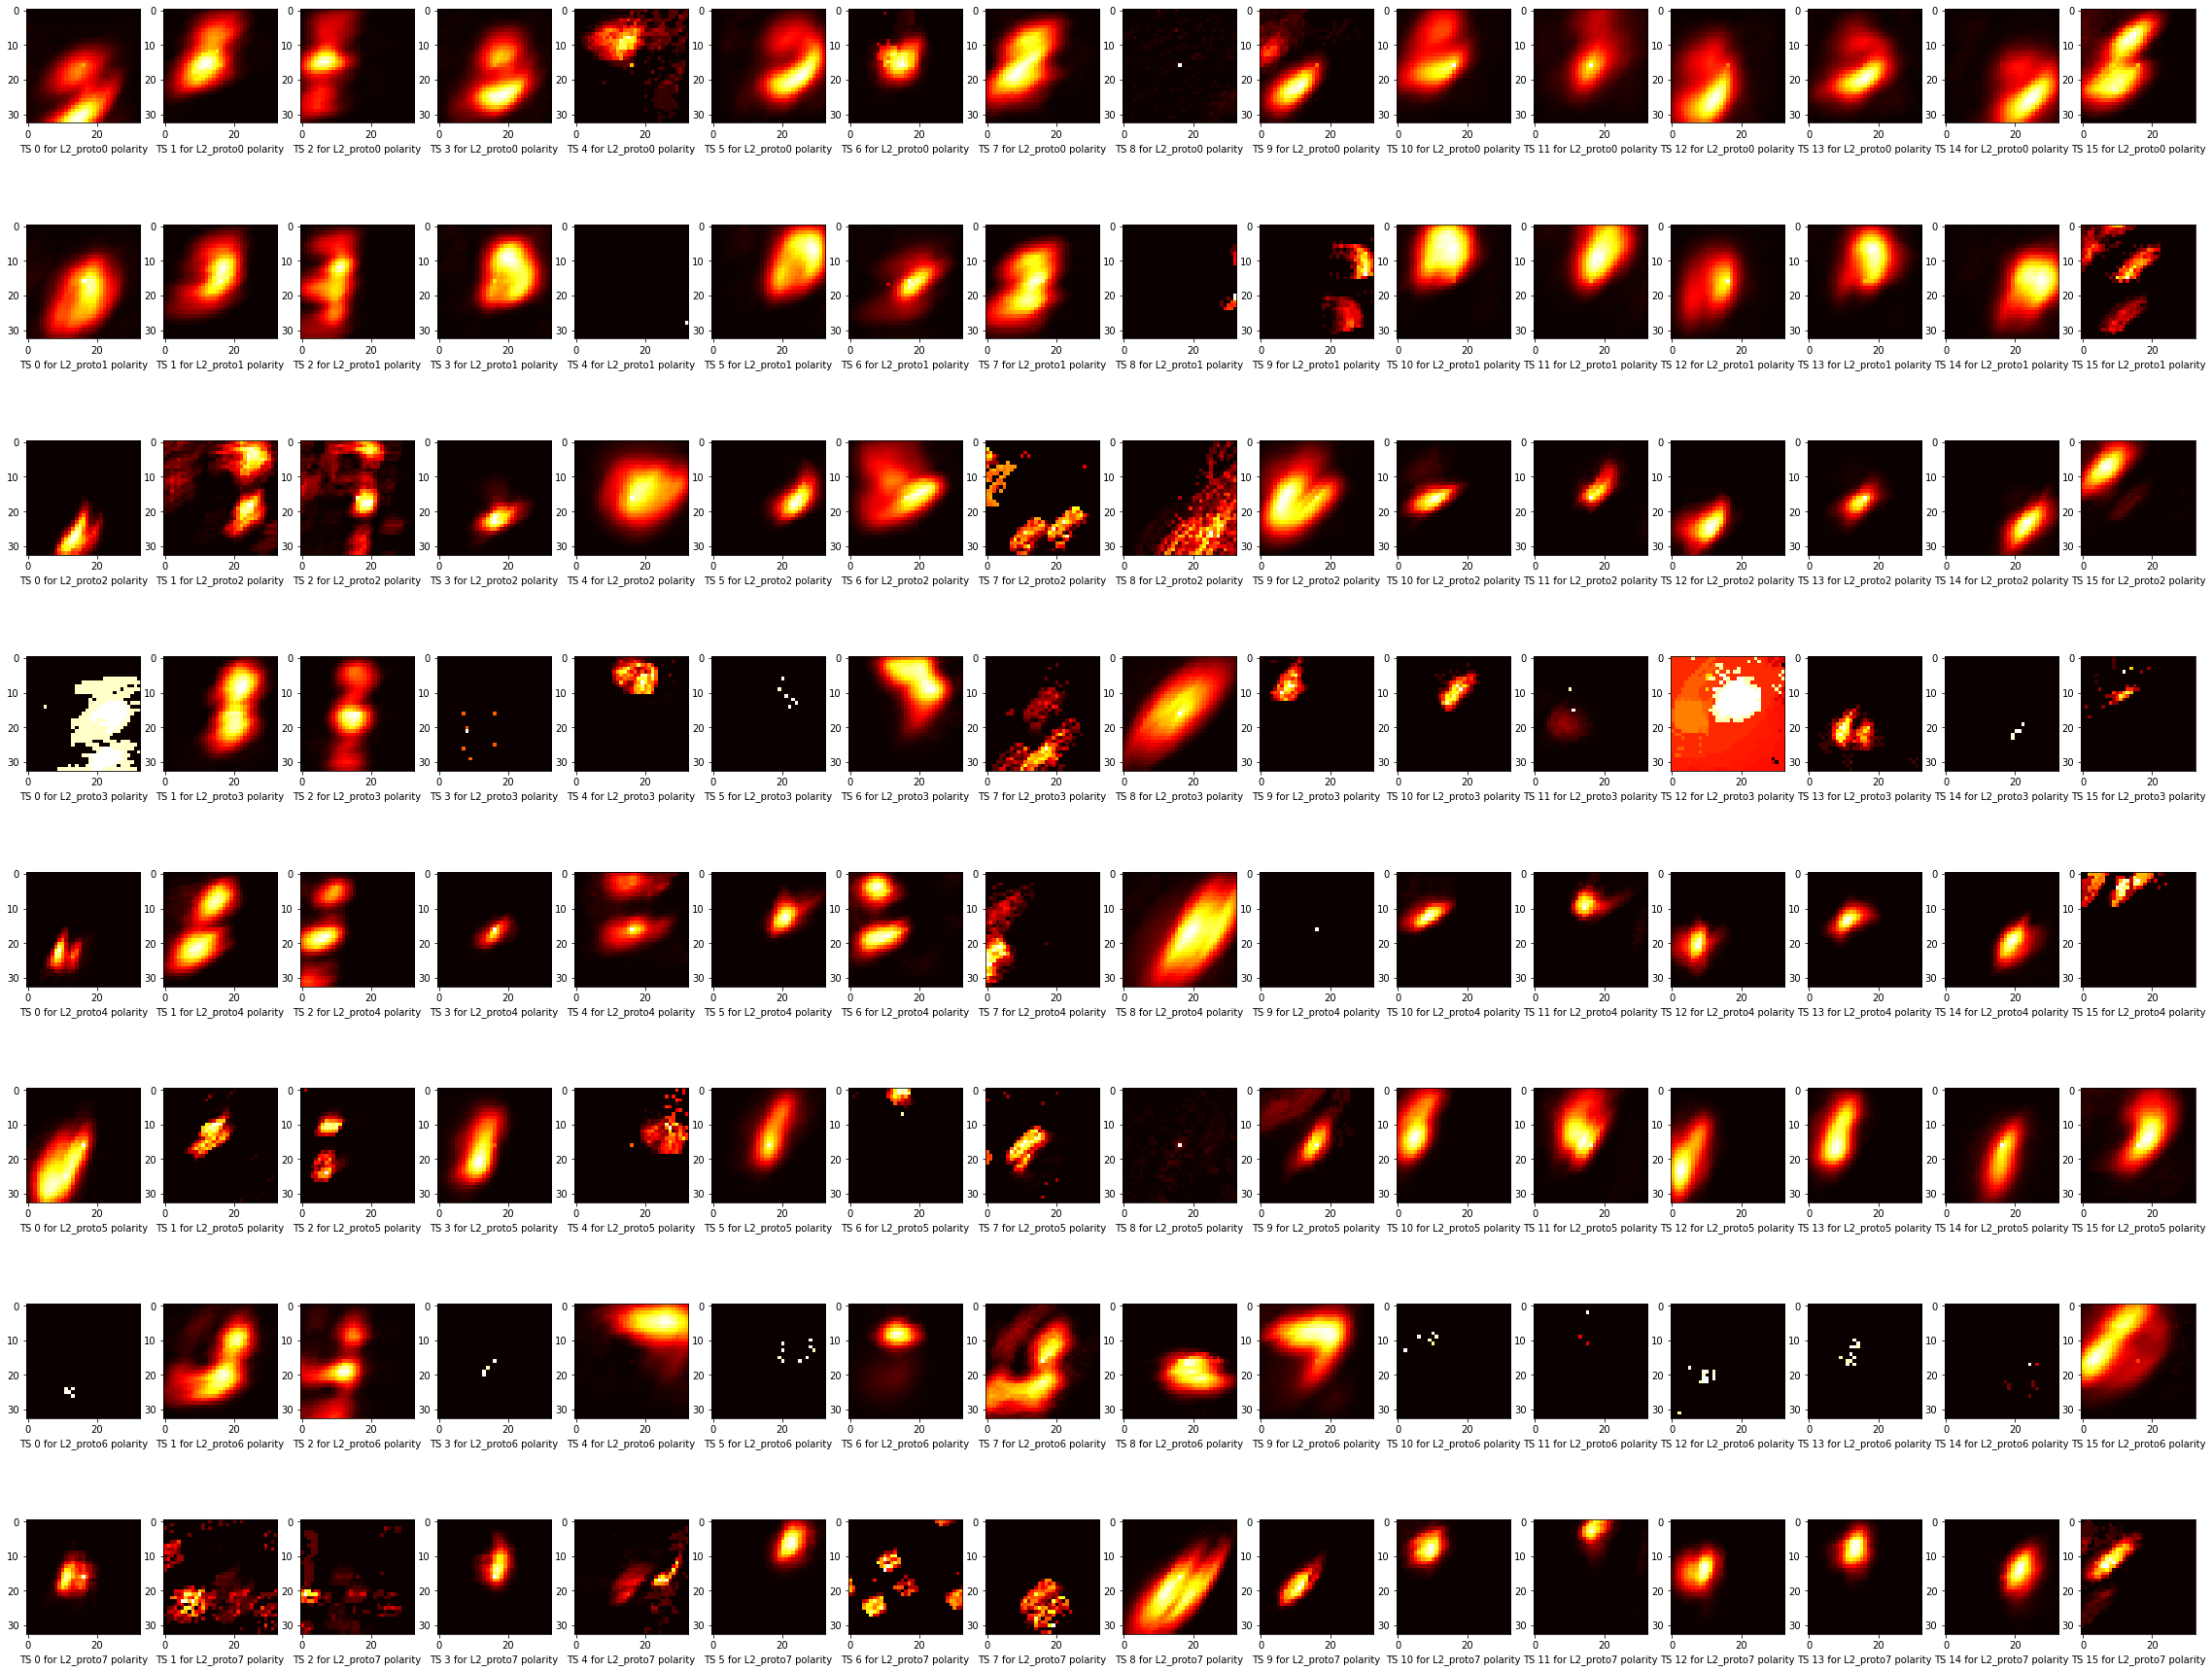

In [30]:
fig=plt.figure(figsize=(40,32))
for i, proto in enumerate(hots.layer3.prototypes):
    for j, polarity in enumerate(layer3_polarities):
        fig.add_subplot(len(layer3_polarities), len(hots.layer3.prototypes), j*len(hots.layer3.prototypes)+i+1)
        plt.imshow(proto.data[:,:,j], cmap='hot')
        plt.xlabel(f'TS {i} for {polarity.name} polarity')
plt.show()

## Training

In [31]:
from collections import Counter
import numpy as np
from concepts import TrainingSample
model_set = []

# Training
for digit in range(n_classes):
    digit_name = list(dataset[f'{digit}'].keys())[:n_samples]
    activations = []
    for name in tqdm(digit_name):
        data = dataset[f'{digit}'][f'{name}']
        events = [Event(*ev) for ev in data]
        output = hots.process(events, mode='predict')

        activations.extend(output)

    activation_count = Counter(event.polarity for event in activations)

    features = np.zeros(16)
    for i in range(features.shape[0]):
        if i in activation_count:
            features[i] = activation_count[i]
        else:
            features[i] = 0
            
    features /= sum(features)
    model_set.append(TrainingSample(features=features, label=digit))

100%|██████████| 15/15 [01:32<00:00,  6.17s/it]


## Testing

In [32]:
def find_closest(feature_vector, feature_set):
    min_dist = 10e10
    label = None
    for sample in feature_set:
        scaled_feature_vector = feature_vector/sum(feature_vector)
        class_feature_vector = sample.features/sum(sample.features)
        dist = np.linalg.norm(scaled_feature_vector - class_feature_vector)
        if dist < min_dist:
            min_dist = dist
            label = sample.label

    return label

In [33]:
correct = 0
total = 0
y_true = []
y_pred = []

for digit in range(n_classes):
    digit_names = list(dataset[f'{digit}'].keys())[n_samples:n_samples+n_test_samples]
    for name in digit_names:
        print(f'digit{digit}, name{name}')
        data = dataset[f'{digit}'][f'{name}']
        events = [Event(*ev) for ev in data]
        output = hots.process(events, mode='predict')

        activation_count = Counter(event.polarity for event in output)

        features = np.zeros(16)
        for i in range(features.shape[0]):
            if i in activation_count:
                features[i] = activation_count[i]
            else:
                features[i] = 0

        features /= sum(features)
        
        pred = find_closest(features, model_set)
        y_pred.append(pred)
        y_true.append(digit)
        
        #print(f'Predicted {pred}, Real {digit}')
        correct += int(digit == pred)
        total += 1

digit0, namedigit_45578
digit0, namedigit_49430
digit0, namedigit_54475
digit0, namedigit_56510
digit0, namedigit_58501
digit1, namedigit_53468
digit1, namedigit_56262
digit1, namedigit_57632
digit1, namedigit_58267
digit1, namedigit_59151
digit2, namedigit_45544
digit2, namedigit_47409
digit2, namedigit_54307
digit2, namedigit_54449
digit2, namedigit_57154
digit3, namedigit_46703
digit3, namedigit_53454
digit3, namedigit_54461
digit3, namedigit_56276
digit3, namedigit_59179


## Metrics

In [34]:
print(f'Accuracy: {correct/total}')

Accuracy: 0.8


In [35]:
def print_confusion_matrix(confusion_matrix, plot_title='Confusion Matrix'):
    
    np.set_printoptions(precision=2)
    
    classes = np.arange(0,10,1)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(confusion_matrix.shape[1]), 
           yticks=np.arange(confusion_matrix.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           title=plot_title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Loop over data dimensions and create text annotations.
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, confusion_matrix[i, j],
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

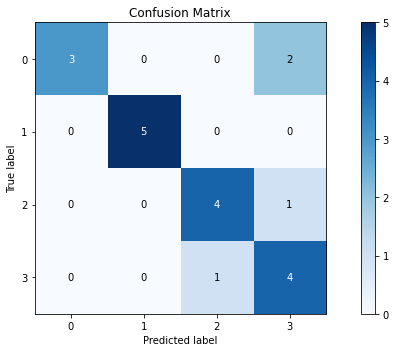

In [36]:
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

print_confusion_matrix( sklearn_confusion_matrix(y_true, y_pred) )